<a href="https://colab.research.google.com/github/davidanagy/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

names = ['party', 'handicapped_infants', 'water_project', 'budget', 'physician_fee_freeze', 'el_salvador_aid',
         'religion_in_schools', 'anti_satellite_test_ban', 'aid_to_contras', 'mx_missile', 'immigration',
         'synfuels_cutback', 'education', 'right_to_sue', 'crime', 'duty_free', 'export_south_africa']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                header=None, names=names, true_values='y', false_values='n', na_values='?')

df = df.fillna(0.5)

print(df.shape)

df.head()

(435, 17)


,party,handicapped_infants,water_project,budget,physician_fee_freeze,el_salvador_aid,religion_in_schools,anti_satellite_test_ban,aid_to_contras,mx_missile,immigration,synfuels_cutback,education,right_to_sue,crime,duty_free,export_south_africa
0,republican,False,True,False,True,True,True,False,False,False,True,0.5,True,True,True,False,True
1,republican,False,True,False,True,True,True,False,False,False,False,False,True,True,True,False,0.5
2,democrat,0.5,True,True,0.5,True,True,False,False,False,False,True,False,True,True,False,False
3,democrat,False,True,True,False,0.5,True,False,False,False,False,True,False,True,False,False,True
4,democrat,True,True,True,False,True,True,False,False,False,False,True,0.5,True,True,True,True


In [6]:
dem = df[df['party']=='democrat']
rep = df[df['party']=='republican']

rep.head()

,party,handicapped_infants,water_project,budget,physician_fee_freeze,el_salvador_aid,religion_in_schools,anti_satellite_test_ban,aid_to_contras,mx_missile,immigration,synfuels_cutback,education,right_to_sue,crime,duty_free,export_south_africa
0,republican,False,True,False,True,True,True,False,False,False,True,0.5,True,True,True,False,True
1,republican,False,True,False,True,True,True,False,False,False,False,False,True,True,True,False,0.5
7,republican,False,True,False,True,True,True,False,False,False,False,False,False,True,True,0.5,True
8,republican,False,True,False,True,True,True,False,False,False,False,False,True,True,True,False,True
10,republican,False,True,False,True,True,False,False,False,False,False,0.5,0.5,True,True,False,False


In [10]:
# Generate and numerically represent confidence intervals.

from scipy.stats import t

n_all = len(df['party'])
n_dem = len(dem['party'])
n_rep = len(rep['party'])

dof_all = n_all - 1
dof_dem = n_dem - 1
dof_rep = n_rep - 1

mean0 = np.mean(df['mx_missile'])
mean1 = np.mean(dem['mx_missile'])
mean2 = np.mean(rep['mx_missile'])

std0 = np.std(df['mx_missile'], ddof=1)
std1 = np.std(dem['mx_missile'], ddof=1)
std2 = np.std(rep['mx_missile'], ddof=1)

std_error0 = std0/n_all**0.5
std_error1 = std0/n_dem**0.5
std_error2 = std1/n_rep**0.5

CI_0 = t.interval(.95, dof_all, loc=mean0, scale=std_error0)
CI_1 = t.interval(.95, dof_dem, loc=mean1, scale=std_error1)
CI_2 = t.interval(.95, dof_rep, loc=mean2, scale=std_error2)

print('The confidence interval of all Representatives voting for the MX Missile is', CI_0)
print('The confidence interval of Democrats voting for the MX Missile is', CI_1)
print('The confidence interval of Republicans voting for the MX Missile is', CI_2)

The confidence interval of all Representatives voting for the MX Missile is (0.45518569817978716, 0.5471131523949254)
The confidence interval of Democrats voting for the MX Missile is (0.6809281797609561, 0.7984725693027144)
The confidence interval of Republicans voting for the MX Missile is (0.05822981009309097, 0.18581780895452807)


In [19]:
# Need this for the graph below.

means = [np.mean(rep['mx_missile']), np.mean(df['mx_missile']), np.mean(dem['mx_missile'])]
means

[0.12202380952380952, 0.5011494252873563, 0.7397003745318352]

In [36]:
# Defining margin of error makes the following graph a lot easier to code.

import scipy.stats as stats

def margin_of_error(data, confidence=0.95):
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1) / np.sqrt(n)
  return stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)

print(margin_of_error(df['mx_missile']), means[1] - margin_of_error(df['mx_missile']), means[1] + margin_of_error(df['mx_missile']))

0.045963727107569116 0.45518569817978716 0.5471131523949254


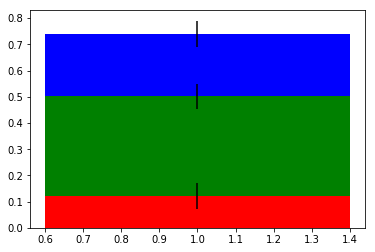

In [37]:
# Graphically represent the confidence intervals.
# The red bar is the Republican vote, the blue bar is the Democratic vote, and the green bar is the vote of all Representatives.

p1 = plt.bar(1, means[0], color='r', yerr=margin_of_error(rep['mx_missile']))
p2 = plt.bar(1, means[1]-means[0], bottom=means[0], color='g', yerr=margin_of_error(df['mx_missile']))
p3 = plt.bar(1, means[2]-means[1], bottom=means[1], color='b', yerr=margin_of_error(dem['mx_missile']))

plt.show()

Assignment: Interpret the confidence intervals - what do they tell you about the data and its distribution?

Answer: The confidence intervals are relatively small here. This indicates that the standard deviation is relatively small for both Democrats and Republicans on the MX Missile vote; each group mostly voted about the same way.

###Chi-Squared Tests:

In [47]:
# Using this "adults" dataset from Sprint 1 Module 2.

column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                 'capital-gain', 'capital-loss', 'hours-per-week', 
                 'native-country', 'income']

adults = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=column_headers)
print(adults.shape)
adults.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [48]:
adults.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [58]:
contingency_table = pd.crosstab(adults['income'], adults['workclass'], margins=True)

contingency_table

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
income,,,,,,,,,,
<=50K,1645,589,1476,7,17733,494,1817,945,14,24720
>50K,191,371,617,0,4963,622,724,353,0,7841
All,1836,960,2093,7,22696,1116,2541,1298,14,32561


In [59]:
row_sums = contingency_table.iloc[0:2, 9].values
column_sums = contingency_table.iloc[2, 0:9].values

print(row_sums)
column_sums

[24720  7841]


array([ 1836,   960,  2093,     7, 22696,  1116,  2541,  1298,    14])

In [60]:
total = contingency_table.loc['All', 'All']
total

32561

In [61]:
expected = []
for i in range (len(row_sums)):
  expected_row = []
  for column in column_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
expected

(2, 9)


array([[1.39387365e+03, 7.28822825e+02, 1.58898560e+03, 5.31433310e+00,
        1.72305863e+04, 8.47256534e+02, 1.92910291e+03, 9.85429194e+02,
        1.06286662e+01],
       [4.42126347e+02, 2.31177175e+02, 5.04014404e+02, 1.68566690e+00,
        5.46541372e+03, 2.68743466e+02, 6.11897085e+02, 3.12570806e+02,
        3.37133380e+00]])

In [63]:
observed = pd.crosstab(adults['income'], adults['workclass']).values
observed

array([[ 1645,   589,  1476,     7, 17733,   494,  1817,   945,    14],
       [  191,   371,   617,     0,  4963,   622,   724,   353,     0]])

In [64]:
chi_squared = ((observed - expected)**2 / (expected)).sum()
chi_squared

1045.7085997281692

In [65]:
print('Chi Squared using Scipy is', stats.chi2_contingency(observed)[0])

Chi Squared using Scipy is 1045.7085997281692


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [68]:
labels = ['handicapped_infants', 'water_project', 'budget', 'physician_fee_freeze', 'el_salvador_aid',
         'religion_in_schools', 'anti_satellite_test_ban', 'aid_to_contras', 'mx_missile', 'immigration',
         'synfuels_cutback', 'education', 'right_to_sue', 'crime', 'duty_free', 'export_south_africa']

means_dem = []
means_rep = []
means_all = []
moe_dem = []
moe_rep = []
moe_all = []

for label in labels:
  means_dem.append(np.mean(dem[label]))
  means_rep.append(np.mean(rep[label]))
  means_all.append(np.mean(df[label]))
  moe_dem.append(margin_of_error(dem[label]))
  moe_rep.append(margin_of_error(rep[label]))
  moe_all.append(margin_of_error(df[label]))
  
print(means_dem)
print(means_rep)
print(means_all)
print(moe_dem)
print(moe_rep)
print(moe_all)

[0.601123595505618, 0.50187265917603, 0.8782771535580525, 0.06741573033707865, 0.22846441947565543, 0.47752808988764045, 0.7640449438202247, 0.8239700374531835, 0.7397003745318352, 0.47191011235955055, 0.5056179775280899, 0.16853932584269662, 0.301498127340824, 0.35580524344569286, 0.6292134831460674, 0.8014981273408239]
[0.19345238095238096, 0.5059523809523809, 0.14285714285714285, 0.9791666666666666, 0.9434523809523809, 0.8928571428571429, 0.25, 0.17559523809523808, 0.12202380952380952, 0.5565476190476191, 0.15178571428571427, 0.8422619047619048, 0.8392857142857143, 0.9613095238095238, 0.11904761904761904, 0.6369047619047619]
[0.4436781609195402, 0.503448275862069, 0.5942528735632184, 0.41954022988505746, 0.5045977011494253, 0.6379310344827587, 0.5655172413793104, 0.5735632183908046, 0.5011494252873563, 0.5045977011494253, 0.3689655172413793, 0.42873563218390803, 0.5091954022988506, 0.5896551724137931, 0.432183908045977, 0.7379310344827587]
[0.058065711214988595, 0.05710809667811392,

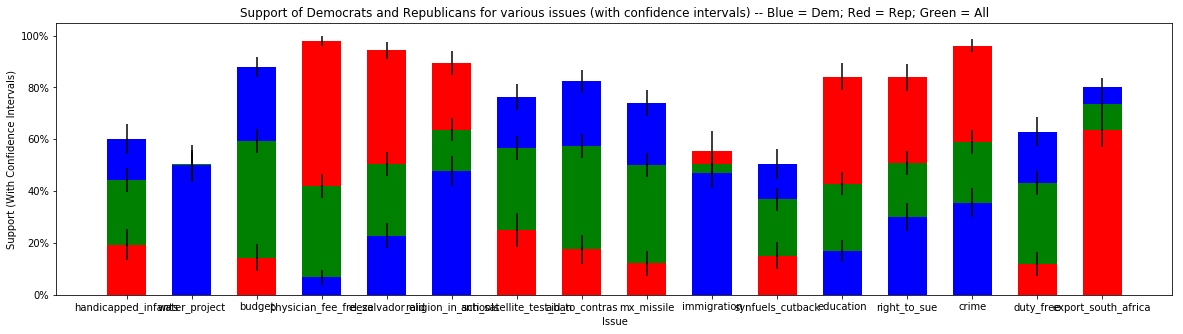

In [90]:
fig, ax = plt.subplots()

fig.set_size_inches(20,5)

# Using a loop to graph all issues at once.
# Using an 'if' statement because which bar is on the bottom depends on which party's support is lower. Te "all" mean always being
# in between the other two means makes things easier.
for i in range(0,16):
  if means_dem[i] < means_rep[i]:
    ax.bar(labels[i], means_dem[i], color='b', yerr=moe_dem[i], width=0.6)
    ax.bar(labels[i], means_all[i]-means_dem[i], bottom=means_dem[i], color='g', yerr=moe_all[i], width=0.6)
    ax.bar(labels[i], means_rep[i]-means_all[i], bottom=means_all[i], color='r', yerr=moe_rep[i], width=0.6)
  else:
    ax.bar(labels[i], means_rep[i], color='r', yerr=moe_rep[i], width=0.6)
    ax.bar(labels[i], means_all[i]-means_rep[i], bottom=means_rep[i], color='g', yerr=moe_all[i], width=0.6)
    ax.bar(labels[i], means_dem[i]-means_all[i], bottom=means_all[i], color='b', yerr=moe_dem[i], width=0.6)
    
ax.set_title('Support of Democrats and Republicans for various issues (with confidence intervals) -- Blue = Dem; Red = Rep; Green = All')
ax.set_xlabel('Issue')
ax.set_ylabel('Support (With Confidence Intervals)')
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
    
plt.show()

###Summary:

The above graph indicates the average support of Democrats (blue), Republicans (red), and both (green) for various issues, along with cofnidence intervals (the black lines). You should read the bars as overlapping--e.g., in the first column, the average Republican voted for the bill about 20% of the time, the average Democrat about 60% of the time, and overall the bill received a vote about 45% of the time.

Our confidence intervals are all relatively small, so we can draw the following conclusions with some certainty about the entire population, not just the sample:

1. Democrats and Republicans have much different views on most issues, the only exceptions being the water project, immigration, and exports to South Africa (though the synthetic fuels cutback has a smaller difference than most, due to only 50% or so of Democrats supporting it).

2. Republicans appear more united than Democrats: Whenever the Republicans support an issue significantly more than Democrats, Republican support always exceeds 80%; however, when Democratic support exceeds Republican support, that Democratic support is sometimes well below 80%.

3. The most controversial issue seems to be the physician fee freeze, which receives almost no support from Democrats but a great deal of support from Republicans.

4. For almost all issues, we can state with 95% confidence that, if Democrats support an issue more than Republicans in the sample (and vice versa), they do so in the population as well. The only exceptions are the water project, immigration, and exports to South Africa, for which we cannot state that with sufficient confidence. (See the confidence interval bars on the graph.)

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)